In [ ]:
#Importing Libraries

from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from skimage import color
from skimage.feature import hog
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skimage.transform import resize
import numpy as np
import os
from matplotlib import rc
import matplotlib.animation as animation
import matplotlib
import cv2
import random
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import copy
import pickle
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/Coursework/'

# Identify path to zipped dataset
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset.zip')
# Copy it to Colab
!cp '{zip_path}' .
# Unzip it (removing useless files stored in the zip)
!yes|unzip -q CW_Dataset.zip
# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

## Loading the dataset

In [ ]:
#Loading Training dataset and splitting it into training and validation sets

trainimgpath='CW_Dataset/train/images/'
labelpath='CW_Dataset/train/labels/'
trainlabels=[]
train_images=[]
vallabels=[]
val_images=[]

imgs_list = listdir(trainimgpath)

random.seed(42)
# Shuffle the list of image filenames
random.shuffle(imgs_list)

# determine the number of images for each set
train_size = int(len(imgs_list) * 0.8)
val_size = int(len(imgs_list) * 0.2)

for i, f in enumerate(imgs_list):
  path=labelpath+f[:-5]+'.txt'
  file=open(path,"r")
  content=file.read()
  image=cv2.imread(trainimgpath+f)

  if i < train_size:
    trainlabels.append(content)
    train_images.append(image)
  else:
    vallabels.append(content)
    val_images.append(image)

In [ ]:
#Loading Test Set
testimgpath='CW_Dataset/test/images/'
testlabelpath='CW_Dataset/test/labels/'
testlabels=[]
test_images=[]

for i in sorted(listdir(testimgpath)):
    path=testlabelpath+i[:-5]+'.txt'
    file=open(path,"r")
    content=file.read()
    testlabels.append(content)
    img=cv2.imread(testimgpath+i)
    test_images.append(img)

In [ ]:
len(train_images),len(val_images),len(test_images)

(1915, 479, 458)

## Creating a new directory to store the images in subfolders for each class

In [ ]:
# os.mkdir('train')
# os.mkdir('train/0')
# os.mkdir('train/1')
# os.mkdir('train/2')
# os.mkdir('val')
# os.mkdir('val/0')
# os.mkdir('val/1')
# os.mkdir('val/2')
# os.mkdir('test')
# os.mkdir('test/0')
# os.mkdir('test/1')
# os.mkdir('test/2')

# #Train and Validation
# random.seed(42)
# random.shuffle(imgs_list)
# # determine the number of images for each set
# train_size = int(len(imgs_list) * 0.8)
# val_size = int(len(imgs_list) * 0.2)

# for i, f in enumerate(imgs_list):
#     path=labelpath+f[:-5]+'.txt'
#     file=open(path,"r")
#     content=file.read()
#     image=Image.open(trainimgpath+f)

#     if i < train_size:
#         dest_folder = 'train'
#     else:
#         dest_folder = 'val'

#     if(content=='0'):
#         image.save(dest_folder+'/0/'+f)
#     if(content=='1'):
#         image.save(dest_folder+'/1/'+f)
#     if(content=='2'):
#         image.save(dest_folder+'/2/'+f)

# #Test Set
# for i in listdir(testimgpath):
#     path=testlabelpath+i[:-5]+'.txt'
#     file=open(path,"r")
#     content=file.read()
#     image=Image.open(testimgpath+i)
#     if(content=='0'):
#         image.save('test/0/'+i)
#     if(content=='1'):
#         image.save('test/1/'+i)
#     if(content=='2'):
#         image.save('test/2/'+i)

## Visualizing the images

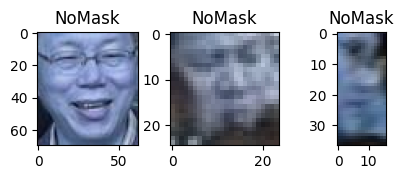

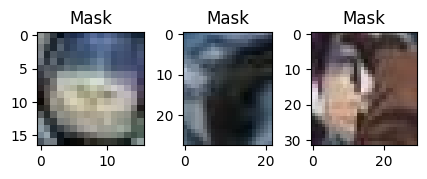

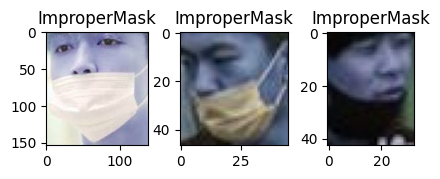

In [ ]:
#Visualizing images of each class from training set

c=0
plt.figure(figsize=(5, 5))

for i in listdir(GOOGLE_DRIVE_PATH+'train/0'):
    if(c>=3):
        break;
    ax = plt.subplot(3, 3, c + 1)
    img=cv2.imread(GOOGLE_DRIVE_PATH+'train/0/'+i)
    plt.imshow(img)
    plt.title("NoMask")
    c+=1

c=0
plt.figure(figsize=(5, 5))

for i in listdir(GOOGLE_DRIVE_PATH+'train/1'):
    if(c>=3):
        break;
    ax = plt.subplot(3, 3, c + 1)
    img=cv2.imread(GOOGLE_DRIVE_PATH+'train/1/'+i)
    plt.imshow(img)
    plt.title("Mask")
    c+=1

c=0
plt.figure(figsize=(5, 5))

for i in listdir(GOOGLE_DRIVE_PATH+'train/2'):
    if(c>=3):
        break;
    ax = plt.subplot(3, 3, c + 1)
    img=cv2.imread(GOOGLE_DRIVE_PATH+'train/2/'+i)
    plt.imshow(img)
    plt.title("ImproperMask")
    c+=1

## **Data Analysis**

In [ ]:
#Analysing train set
traincounts=dict(Counter(trainlabels))
valcounts=dict(Counter(vallabels))
testcounts=dict(Counter(testlabels))

traincounts,valcounts,testcounts

({'1': 1549, '0': 310, '2': 56},
 {'1': 391, '2': 22, '0': 66},
 {'1': 388, '0': 51, '2': 19})

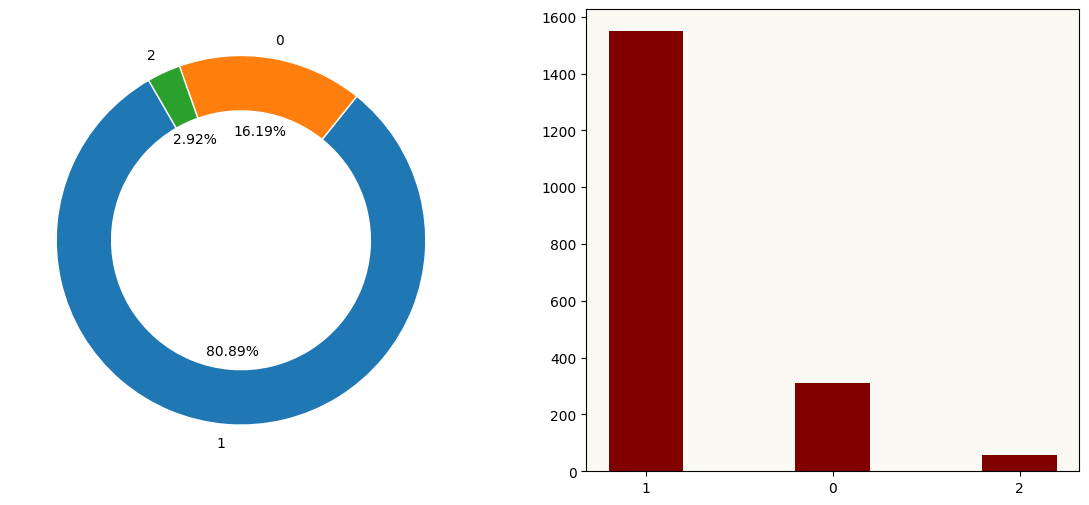

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(traincounts.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=traincounts.keys(), radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(traincounts.keys(), list(traincounts.values()),
              color ='maroon',width = 0.4)

plt.show()

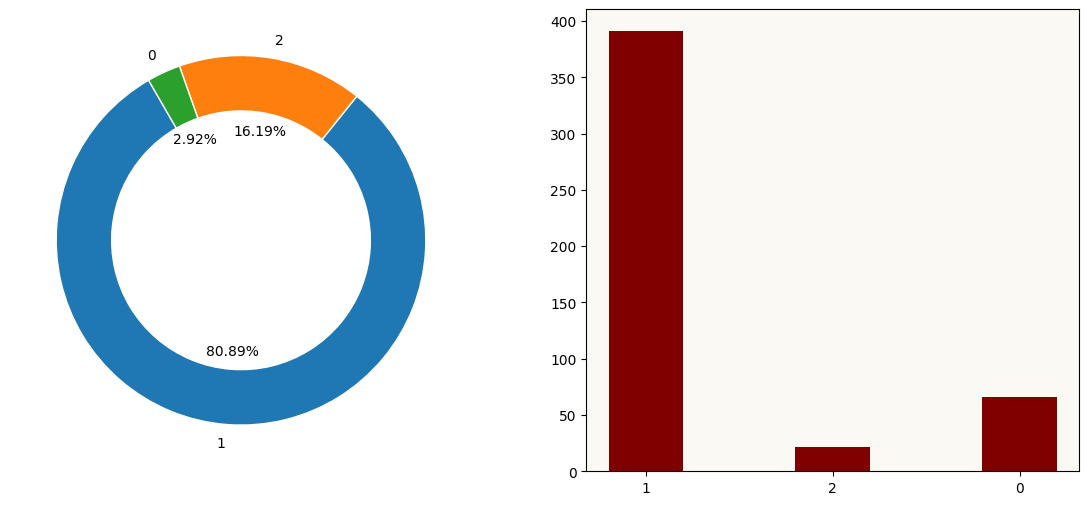

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(traincounts.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=valcounts.keys(), radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(valcounts.keys(), list(valcounts.values()),
              color ='maroon',width = 0.4)

plt.show()

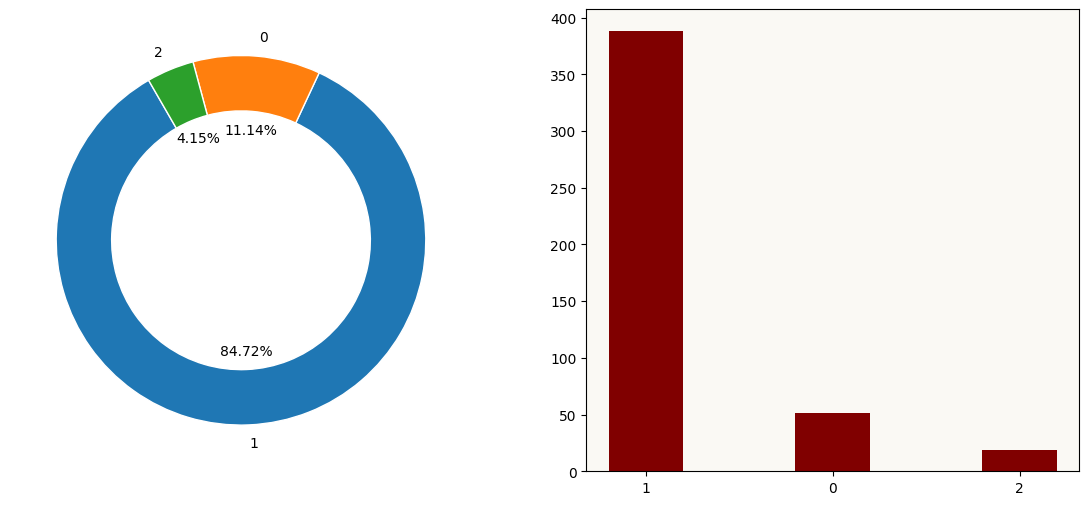

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax1.pie(testcounts.values(),wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=testcounts.keys(), radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(testcounts.keys(), list(testcounts.values()),
              color ='maroon',width = 0.4)

plt.show()

## Model 1: Resnet CNN Implementation

In [ ]:
# device = torch.device("cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def calc_avg_mean_std(images):
    mean_sum = np.array([0., 0., 0.])
    std_sum = np.array([0., 0., 0.])
    n_images = len(images)
    for img in images:
        mean, std = cv2.meanStdDev(img)
        mean_sum += np.squeeze(mean)
        std_sum += np.squeeze(std)
    return (mean_sum / n_images, std_sum / n_images)

In [ ]:
train_data_means,train_data_stds=calc_avg_mean_std(train_images)
val_data_means,val_data_stds=calc_avg_mean_std(val_images)
test_data_means,test_data_stds=calc_avg_mean_std(test_images)

The codes for data transformation and the functions mentioned below are adapted from Lab Tutorial 08 of the Computer Vision Module(IN3060/INM460) authored by Giacomo Tarroni. I have made required changes according to the needs of the current task.


*   valimshow
*   testimshow
*   train_model
*   visualize_model_val
*   visualize_model_test





In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((300,300)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(train_data_means, train_data_stds)
    ]),
    'val': transforms.Compose([
        transforms.Resize((300,300)),
        transforms.ToTensor(),
        transforms.Normalize(val_data_means,val_data_stds)
    ]),
    'test': transforms.Compose([
        transforms.Resize((300,300)),
        transforms.ToTensor(),
        transforms.Normalize(test_data_means, test_data_stds)
    ]),
}

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(GOOGLE_DRIVE_PATH, x),
                                          data_transforms[x])
                  for x in ['train','val','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train','val','test']}

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val', 'test']}
dataset_sizes

{'train': 1915, 'val': 479, 'test': 458}

In [ ]:
class_names = image_datasets['train'].classes
class_names

['0', '1', '2']

In [ ]:
torch.save(dataloaders, 'dataloader.pth')

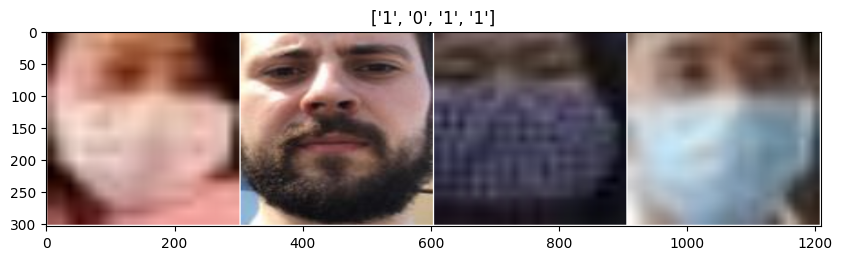

In [ ]:
#function to visualise validation set images
def valimshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.asarray(val_data_stds) * inp + np.asarray(val_data_means)
    inp = np.clip(inp, 0, 1)       # Clip to intensity outliers to [0, 1] range
    plt.imshow(inp)
    if title is not None:
        plt.title(title)


# Get a batch of training data
first_inputs, first_classes = next(iter(dataloaders['val']))

# Make a grid from batch
out = torchvision.utils.make_grid(first_inputs)

plt.figure(figsize=(10, 15))
valimshow(out, title=[class_names[x] for x in first_classes])
plt.show()

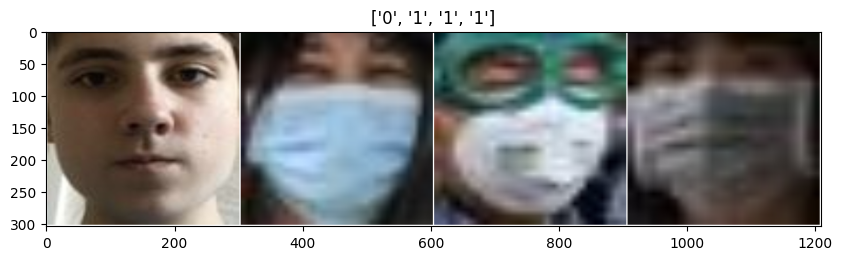

In [ ]:
#function to visualise test set images
def testimshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.asarray(test_data_stds) * inp + np.asarray(test_data_means)
    inp = np.clip(inp, 0, 1)       # Clip to intensity outliers to [0, 1] range
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

# Get a batch of training data
first_inputs, first_classes = next(iter(dataloaders['test']))

# Make a grid from batch
out = torchvision.utils.make_grid(first_inputs)

plt.figure(figsize=(10, 15))
testimshow(out, title=[class_names[x] for x in first_classes])
plt.show()

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch}/{num_epochs - 1}")
        print('----------------')

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                # move data to GPU
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # update learning rate with scheduler
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} loss: {epoch_loss:.4f} acc: {epoch_acc:.4f}")

            # deep copy the model with best accuracy on validation set
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best val acc: {best_acc:4f}")

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
#function to visualise model predictions on validation data
def visualize_model_val(model, num_images=4):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f"Actual: {labels[j].item()} Predicted: {class_names[preds[j]]}")
                valimshow(inputs.cpu().data[j])        # move back the data to the CPU for visualisation

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
#function to visualise model predictions on test data
def visualize_model_test(model, num_images=4):
    was_training = model.training
    model.eval()
    images_so_far = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f"Actual: {labels[j].item()} Predicted: {class_names[preds[j]]}")
                testimshow(inputs.cpu().data[j])        # move back the data to the CPU for visualisation

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
#loading the pre-train model ResNet50
model_ft = models.resnet50(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s]


In [ ]:
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 3)

In [ ]:
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------------
train loss: 0.3663 acc: 0.8742
val loss: 0.9380 acc: 0.7975

Epoch 1/14
----------------
train loss: 0.2475 acc: 0.9159
val loss: 0.7682 acc: 0.7954

Epoch 2/14
----------------
train loss: 0.1981 acc: 0.9279
val loss: 1.6143 acc: 0.7975

Epoch 3/14
----------------
train loss: 0.2030 acc: 0.9316
val loss: 0.7405 acc: 0.7954

Epoch 4/14
----------------
train loss: 0.1603 acc: 0.9441
val loss: 1.9002 acc: 0.7975

Epoch 5/14
----------------
train loss: 0.1377 acc: 0.9525
val loss: 0.7244 acc: 0.7975

Epoch 6/14
----------------
train loss: 0.1436 acc: 0.9462
val loss: 0.2067 acc: 0.9207

Epoch 7/14
----------------
train loss: 0.1029 acc: 0.9708
val loss: 0.2568 acc: 0.8894

Epoch 8/14
----------------
train loss: 0.0972 acc: 0.9770
val loss: 0.2253 acc: 0.9144

Epoch 9/14
----------------
train loss: 0.0785 acc: 0.9775
val loss: 0.2349 acc: 0.9165

Epoch 10/14
----------------
train loss: 0.0587 acc: 0.9838
val loss: 0.2223 acc: 0.9165

Epoch 11/14
--------

In [ ]:
torch.save(model_ft, 'cnnmodel.pth')
torch.save(model_ft.state_dict(), 'cnn_state_dict.pth')

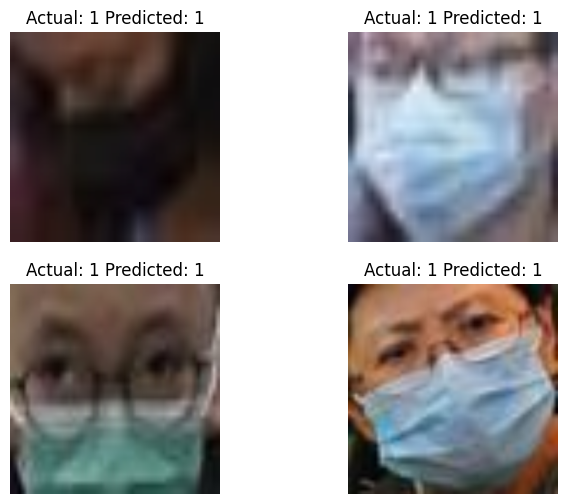

In [ ]:
plt.figure(figsize=(8, 6))
visualize_model_val(model_ft)
plt.show()

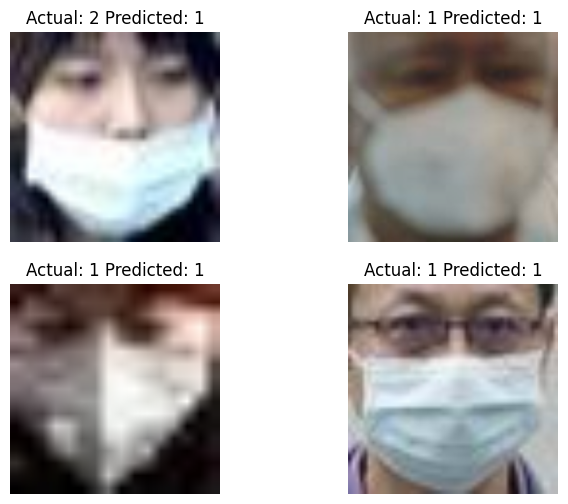

In [ ]:
plt.figure(figsize=(8, 6))
visualize_model_test(model_ft)
plt.show()

In [ ]:
pred_labels=pd.DataFrame({'Actual':[],'Predicted':[]})

#function to store the actual and predicted value from the model in a dataframe
def predict_model_test(model):
    was_training = model.training
    model.eval()
    c=0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
              pred_labels.loc[c]=[str(labels[j].item()),class_names[preds[j]]]
              c+=1

In [ ]:
predict_model_test(model_ft)

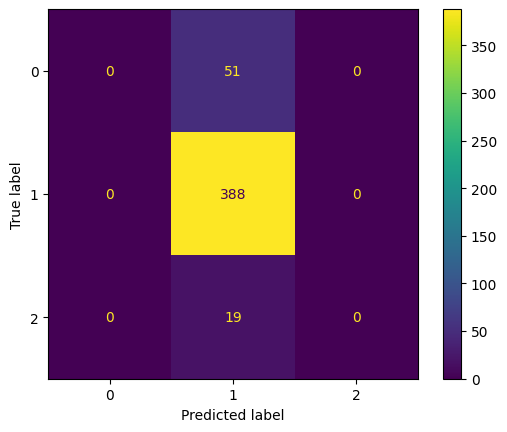

In [ ]:
cm = confusion_matrix(pred_labels['Actual'], pred_labels['Predicted'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.show()

In [ ]:
print("Accuracy: "+str(accuracy_score(pred_labels['Actual'], pred_labels['Predicted'])))
print('\n')
print(classification_report(pred_labels['Actual'], pred_labels['Predicted']))

Accuracy: 0.8471615720524017


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.85      1.00      0.92       388
           2       0.00      0.00      0.00        19

    accuracy                           0.85       458
   macro avg       0.28      0.33      0.31       458
weighted avg       0.72      0.85      0.78       458



## HOG Feature Extraction

In [ ]:
def hog_extraction(img):
  face_gray = color.rgb2gray(img)
  resized_face=resize(face_gray, (128,64))
  ppc = 16

  fd,hog_image = hog(resized_face, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(2,2),visualize=True)

  return fd,hog_image

In [ ]:
#Applying HOG Feature Extraction
ppc = 16

#training set
hog_images_train = []
hog_features_train = []
for image in train_images:
    fd,hog_image = hog_extraction(image)
    hog_images_train.append(hog_image)
    hog_features_train.append(fd)

#validation set
hog_images_val = []
hog_features_val = []
for image in val_images:
    fd,hog_image = hog_extraction(image)
    hog_images_val.append(hog_image)
    hog_features_val.append(fd)

#testing set
hog_images_test = []
hog_features_test = []
for image in test_images:
    fd,hog_image = hog_extraction(image)
    hog_images_test.append(hog_image)
    hog_features_test.append(fd)

In [ ]:
#Preparing the labels data structure appropriate for model training
labels_train =  np.array(trainlabels).reshape(len(trainlabels),1)
labels_val =  np.array(vallabels).reshape(len(vallabels),1)
labels_test =  np.array(testlabels).reshape(len(testlabels),1)

## Model 2: HOG+SVM

Finding the best hyper-parameters by testing the model on validation set

In [ ]:
#kernel
print("kernel")
kernels =['linear', 'rbf', 'poly','sigmoid']
for kernel in kernels:
  svc = svm.SVC(kernel=kernel).fit(hog_features_train,labels_train.ravel())
  y_pred = svc.predict(hog_features_val)
  print(f"Accuracy for {kernel} = {accuracy_score(labels_val,y_pred)}")

#gamma
print("\n gamma")
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
  svc = svm.SVC(kernel='poly',gamma=gamma).fit(hog_features_train,labels_train.ravel())
  y_pred = svc.predict(hog_features_val)
  print(f"Accuracy for {gamma} = {accuracy_score(labels_val,y_pred)}")

#C
print("\n C")
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
  svc = svm.SVC(kernel='poly',C=c).fit(hog_features_train,labels_train.ravel())
  y_pred = svc.predict(hog_features_val)
  print(f"Accuracy for {c} = {accuracy_score(labels_val,y_pred)}")

#degree
print("\n degree")
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
  svc = svm.SVC(kernel='poly',degree=degree).fit(hog_features_train,labels_train.ravel())
  y_pred = svc.predict(hog_features_val)
  print(f"Accuracy for {degree} = {accuracy_score(labels_val,y_pred)}")

kernel
Accuracy for linear = 0.872651356993737
Accuracy for rbf = 0.8810020876826722
Accuracy for poly = 0.8872651356993737
Accuracy for sigmoid = 0.8058455114822547

 gamma
Accuracy for 0.1 = 0.8830897703549061
Accuracy for 1 = 0.8872651356993737
Accuracy for 10 = 0.8872651356993737
Accuracy for 100 = 0.8872651356993737

 C
Accuracy for 0.1 = 0.8810020876826722
Accuracy for 1 = 0.8872651356993737
Accuracy for 10 = 0.8872651356993737
Accuracy for 100 = 0.8872651356993737
Accuracy for 1000 = 0.8872651356993737

 degree
Accuracy for 0 = 0.8079331941544885
Accuracy for 1 = 0.8580375782881002
Accuracy for 2 = 0.8747390396659708
Accuracy for 3 = 0.8872651356993737
Accuracy for 4 = 0.8914405010438413
Accuracy for 5 = 0.8914405010438413
Accuracy for 6 = 0.9018789144050104


In [ ]:
#Applying the optimum hyper-parameters to our final model, haven't specified gamma and C as all the values yield similar results
svm_classifier = svm.SVC(kernel='poly',degree=6)

In [ ]:
start_time = time.time()

svm_classifier.fit(hog_features_train,labels_train)

end_time = time.time()
print("Elapsed time: ", end_time - start_time)

Elapsed time:  1.4280879497528076


In [ ]:
y_pred = svm_classifier.predict(hog_features_test)

In [ ]:
print("Accuracy: "+str(accuracy_score(labels_test, y_pred)))
print('\n')
print(classification_report(labels_test, y_pred))

Accuracy: 0.888646288209607


              precision    recall  f1-score   support

           0       0.65      0.47      0.55        51
           1       0.91      0.97      0.94       388
           2       1.00      0.26      0.42        19

    accuracy                           0.89       458
   macro avg       0.85      0.57      0.63       458
weighted avg       0.88      0.89      0.87       458



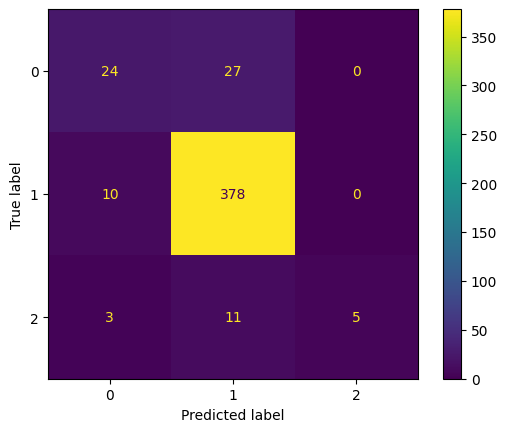

In [ ]:
cm = confusion_matrix(labels_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier.classes_)
disp.plot()
plt.show()

In [ ]:
# save model
with open('svmmodel.pkl','wb') as f:
    pickle.dump(svm_classifier,f)


In [ ]:
# # load
# with open('/content/drive/MyDrive/CW_Folder_PG/Models/svmmodel.pkl', 'rb') as f:
#     svmmodel = pickle.load(f)

## Model 3: HOG+MLP Implementation

Comparing model performance on validation set based on different values of hyperparameters

In [ ]:

#hidden_layer_sizes
print("\n hidden_layer_sizes")
hls =[(20,),(30,),(40,),(60,),(80,)]
for h in hls:
  classifier = MLPClassifier(hidden_layer_sizes=h).fit(hog_features_train,labels_train.ravel())
  y_pred = classifier.predict(hog_features_val)
  print(f"Accuracy for {h} = {accuracy_score(labels_val,y_pred)}")

#max_iter
print("\n max_iter")
iter=[200,300,400,500,600]
for i in iter:
  classifier = MLPClassifier(max_iter=i).fit(hog_features_train,labels_train.ravel())
  y_pred = classifier.predict(hog_features_val)
  print(f"Accuracy for {i} = {accuracy_score(labels_val,y_pred)}")

#solver
print("\n solver")
solver=['lbfgs', 'sgd', 'adam']
for i in solver:
  classifier = MLPClassifier(solver=i).fit(hog_features_train,labels_train.ravel())
  y_pred = classifier.predict(hog_features_val)
  print(f"Accuracy for {i} = {accuracy_score(labels_val,y_pred)}")

#learning_rate
print("\n learning_rate")
lr=['constant', 'invscaling', 'adaptive']
for i in lr:
  classifier = MLPClassifier(learning_rate=i).fit(hog_features_train,labels_train.ravel())
  y_pred = classifier.predict(hog_features_val)
  print(f"Accuracy for {i} = {accuracy_score(labels_val,y_pred)}")

#learning_rate_init
print("\n learning_rate_init")
lri=[0.0001,0.001,0.01,0.1]
for i in lri:
  classifier = MLPClassifier(learning_rate_init=i,learning_rate='invscaling',max_iter=300).fit(hog_features_train,labels_train.ravel())
  y_pred = classifier.predict(hog_features_val)
  print(f"Accuracy for {i} = {accuracy_score(labels_val,y_pred)}")

#momentum
print("\n momentum")
momentum=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in momentum:
  classifier = MLPClassifier(momentum=i).fit(hog_features_train,labels_train.ravel())
  y_pred = classifier.predict(hog_features_val)
  print(f"Accuracy for {i} = {accuracy_score(labels_val,y_pred)}")


 hidden_layer_sizes
Accuracy for (20,) = 0.8517745302713987
Accuracy for (30,) = 0.8559498956158664
Accuracy for (40,) = 0.8517745302713987
Accuracy for (60,) = 0.8559498956158664
Accuracy for (80,) = 0.8643006263048016

 max_iter
Accuracy for 200 = 0.860125260960334
Accuracy for 300 = 0.8538622129436325
Accuracy for 400 = 0.8559498956158664
Accuracy for 500 = 0.8622129436325678
Accuracy for 600 = 0.8538622129436325

 solver
Accuracy for lbfgs = 0.8517745302713987
Accuracy for sgd = 0.8455114822546973
Accuracy for adam = 0.8559498956158664

 learning_rate
Accuracy for constant = 0.8663883089770354
Accuracy for invscaling = 0.8496868475991649
Accuracy for adaptive = 0.8684759916492694

 learning_rate_init
Accuracy for 0.0001 = 0.8684759916492694
Accuracy for 0.001 = 0.8559498956158664
Accuracy for 0.01 = 0.8663883089770354
Accuracy for 0.1 = 0.8434237995824635

 momentum
Accuracy for 0.1 = 0.8643006263048016
Accuracy for 0.2 = 0.872651356993737
Accuracy for 0.3 = 0.8663883089770354
Acc

In [ ]:
# Create a classifier: Multi-Layer Perceptron
mlp_classifier = MLPClassifier(hidden_layer_sizes=(60,), max_iter=60, alpha=1e-4,
                    solver='sgd', verbose=True, random_state=1,
                    learning_rate_init=.1)

start_time = time.time()

mlp_classifier.fit(hog_features_train,labels_train)

end_time = time.time()
print("Elapsed time: ", end_time - start_time)

Iteration 1, loss = 0.69949002
Iteration 2, loss = 0.50438780
Iteration 3, loss = 0.43092116
Iteration 4, loss = 0.38651726
Iteration 5, loss = 0.34899644
Iteration 6, loss = 0.33201429
Iteration 7, loss = 0.31466247
Iteration 8, loss = 0.30567089
Iteration 9, loss = 0.30278747
Iteration 10, loss = 0.28730716
Iteration 11, loss = 0.27165513
Iteration 12, loss = 0.25937636
Iteration 13, loss = 0.25729938
Iteration 14, loss = 0.24237005
Iteration 15, loss = 0.22968469
Iteration 16, loss = 0.21853221
Iteration 17, loss = 0.21774819
Iteration 18, loss = 0.20264216
Iteration 19, loss = 0.20193139
Iteration 20, loss = 0.20443838
Iteration 21, loss = 0.18851680
Iteration 22, loss = 0.18384692
Iteration 23, loss = 0.17085384
Iteration 24, loss = 0.18787955
Iteration 25, loss = 0.16434304
Iteration 26, loss = 0.19799700
Iteration 27, loss = 0.14627121
Iteration 28, loss = 0.14614400
Iteration 29, loss = 0.13254842
Iteration 30, loss = 0.11739123
Iteration 31, loss = 0.13495845
Iteration 32, los

In [ ]:
y_pred = mlp_classifier.predict(hog_features_test)

In [ ]:
print("Accuracy: "+str(accuracy_score(labels_test, y_pred)))
print('\n')
print(classification_report(labels_test, y_pred))

Accuracy: 0.8537117903930131


              precision    recall  f1-score   support

           0       0.46      0.47      0.47        51
           1       0.92      0.93      0.93       388
           2       0.44      0.37      0.40        19

    accuracy                           0.85       458
   macro avg       0.61      0.59      0.60       458
weighted avg       0.85      0.85      0.85       458



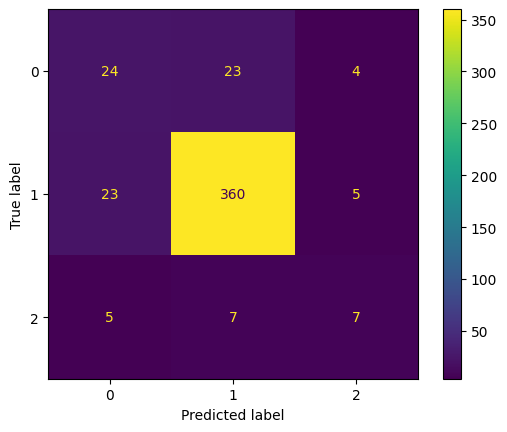

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(labels_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [ ]:
# save
with open('mlpmodel.pkl','wb') as f:
    pickle.dump(mlp_classifier,f)

## Visualising Model Predictions

In [ ]:
#Function to visualise the predictions obtained by the different models on the test set images

def MaskDetect(test,model):
  index=random.sample(range(0,len(test)),4)      #generating 4 random indexes of test set
  if type(model).__name__!="ResNet":
    hog_features_test = []
    for i in index:
      image=test[i]
      fd,hog_image = hog_extraction(image)
      hog_features_test.append(fd)

    labels_test =  np.array(testlabels).reshape(len(testlabels),1)
    y_pred = model.predict(hog_features_test)


    plt.figure(figsize=(8, 6))
    c=0

    for i in index:
      ax = plt.subplot(2, 2, c + 1)
      plt.imshow(test[i])
      ax.set_title(f"Actual:{labels_test[i].item()} Predicted:{y_pred[c]}")
      c+=1
      plt.axis('off')

  elif type(model).__name__=="ResNet":
    visualize_model_test(model,4)

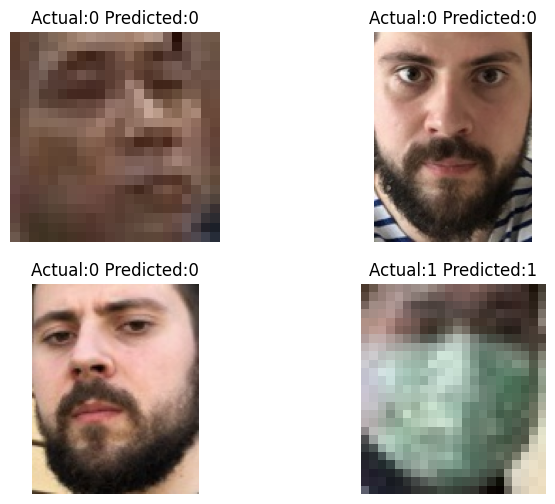

In [ ]:
MaskDetect(test_images,svm_classifier)

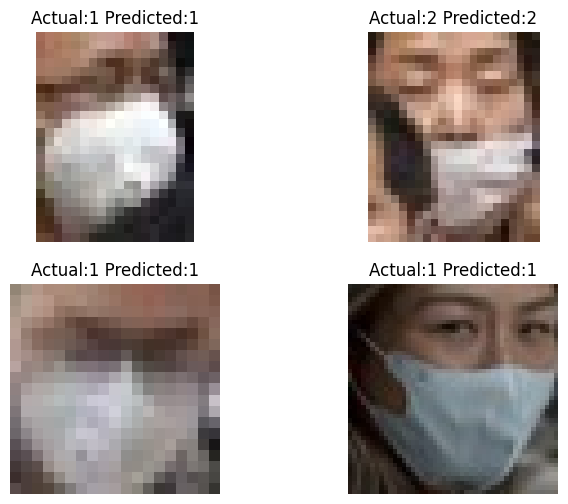

In [ ]:
MaskDetect(test_images,mlp_classifier)

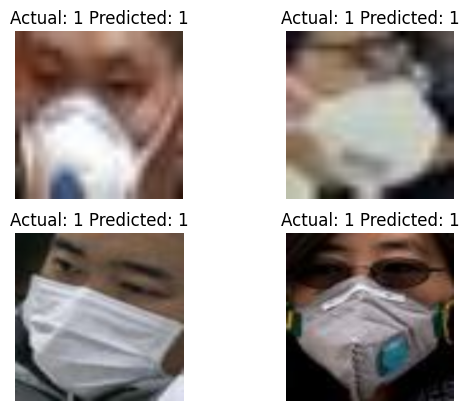

In [ ]:
MaskDetect(test_images,model_ft)

## Face Covering Detection in a video

In [ ]:
def MaskDetectionVideo(cap):
  cap = cv2.VideoCapture(os.path.join('/content/drive/MyDrive/CW_Folder_PG/Video', video))
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  video = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
  fc = 0
  ret = True
  while fc < frameCount and ret:
      ret, video[fc] = cap.read()
      video[fc] = cv2.cvtColor(video[fc], cv2.COLOR_BGR2RGB)
      fc += 1
  cap.release()

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  fcd=video
  font = cv2.FONT_HERSHEY_SIMPLEX
  height, width, channels = video[0,:,:,:].shape
  #iterating through the video frames to detect faces and feeding it to the model for class prediction
  for i in range(fcd.shape[0]):
    img=fcd[i,:,:,:]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
      face_image = Image.fromarray(img[max(0, y):min(height, y+h), max(0, x):min(width, x+w)])
      hog_features,hog_images=hog_extraction(face_image)
      face_pred = classifier.predict(hog_features.reshape(1,-1))
      fcd[i,:,:,:]=cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
      fcd[i,:,:,:]=cv2.putText(img, str(face_pred), (x+5,y-5), font, 1, (255,255,255), 2)

  #saving 500 frames of the video with predicted classes as
  rc('animation', html='jshtml')
  fig, ax = plt.subplots(figsize=(5, 3))
  x=fcd[1400:1900,:,:,:]
  def frame(i):
      ax.clear()
      ax.axis('off')
      fig.tight_layout()
      plot=ax.imshow(x[i, :, :, :])
      return plot
  anim = animation.FuncAnimation(fig, frame, frames=500)
  writervideo = animation.FFMpegWriter(fps=30)
  anim.save('maskdetect.mp4', writer=writervideo)

In [ ]:
MaskDetectionVideo('mask.mp4')

In [ ]:
import moviepy.editor
moviepy.editor.ipython_display("maskdetect.mp4")